# Welcome to OSMNxMapping ☀️!

In this Jupyter notebook, we'll showcase a basic, concise, and reproducible workflow using the `UrbanPipeline` class in OSMNxMapping. We'll process PLUTO (Primary Land Use Tax Lot Output) building data from New York City, enrich a Manhattan road network with the average number of floors per street segment, and demonstrate how to save and load the pipeline for later use.

**Goal**: Learn to:
- Import the OSMNxMapping library and necessary modules.
- Initialise an OSMNxMapping instance.
- Build a pipeline with steps for loading, preprocessing, networking, enriching, and visualising.
- Execute the pipeline in one go with `compose_transform`.
- Visualise the enriched network.
- Save the pipeline to a file.
- Load the pipeline and reuse it.

Unlike previous notebooks, we won’t use Auctus here—data must be available locally in CSV, Shapefile, or Parquet format. We'll use a sample CSV file (`pluto.csv`). For foundational steps or alternative approaches, refer to the `1-OSMNX_MAPPING_with_Auctus_basics` notebook.

Let’s get started! 🚀

## Step 1: Import the Library and Modules

We begin by importing the `osmnx_mapping` library with the alias `oxm`, along with the necessary pipeline and module classes to build our workflow.

In [1]:
import osmnx_mapping as oxm
from osmnx_mapping.modules.network import OSMNxNetwork
from osmnx_mapping.modules.loader import CSVLoader
from osmnx_mapping.modules.preprocessing import CreatePreprocessor
from osmnx_mapping.modules.enricher import CreateEnricher
from osmnx_mapping.modules.visualiser import InteractiveVisualiser, StaticVisualiser
from osmnx_mapping.pipeline import UrbanPipeline

## Step 2: Initialise an OSMNxMapping Instance

We create an instance of `OSMNxMapping` named `pluto_buildings`. This instance will serve as the foundation for managing our pipeline and urban data analysis.

In [2]:
pluto_buildings = oxm.OSMNxMapping()

## Step 3: Build the Urban Pipeline

We construct an `UrbanPipeline` with a series of steps to process our data:

- **Network**: Query a Manhattan road network using `OSMNxNetwork`.
- **Load**: Load PLUTO building data from a CSV file (`pluto.csv`) with `CSVLoader`.
- **Impute**: Drop rows with missing latitude/longitude using `SimpleGeoImputer`.
- **Filter**: Keep data within the network’s bounding box using `BoundingBoxFilter`.
- **Enrich**: Calculate the average number of floors per street segment with `CreateEnricher`.
- **Visualise**: Set up a `StaticVisualiser` for static output (we’ll switch to interactive later).

> **Note**: Ensure the file path (`"./pluto.csv"`) matches your local CSV file’s location. Adjust column names (`"latitude"`, `"longitude"`, `"numfloors"`) if they differ in your dataset.

In [6]:
pipeline = UrbanPipeline([
    ("network", OSMNxNetwork(place_name="Manhattan, NYC", network_type="drive")),
    ("load", CSVLoader(file_path="./pluto.csv")),
    ("impute", CreatePreprocessor().with_imputer(
        imputer_type="SimpleGeoImputer",
    ).build()),
    ("filter", CreatePreprocessor().with_filter(
        filter_type="BoundingBoxFilter",
    ).build()),
    ("enrich", CreateEnricher()
        .with_data(group_by="nearest_node", values_from="numfloors")
        .aggregate_with(method="mean", edge_method="average", output_column="avg_numfloors")
        .build()),
    ("viz", StaticVisualiser())
])

## Step 4: Execute the Pipeline

We run the pipeline in one concise step using `compose_transform`, which configures and executes all steps (loading, preprocessing, networking, enriching). We specify the latitude and longitude column names required for the workflow.

Note that you could have done the .compose(latitude_column_name, longitude_column_name) and .transform() steps separately as well.

This returns the processed data, enriched graph, nodes, and edges.

In [7]:
data, graph, nodes, edges = pipeline.compose_transform(
    latitude_column_name="latitude",
    longitude_column_name="longitude"
)

/Users/sgp28/Desktop/Delivery/NYU/OSMNXMapping/src/osmnx_mapping/modules/loader/loaders/csv_loader.py:34: DtypeWarning: Columns (21,22,24,26,28,65,66,88) have mixed types. Specify dtype option on import or set low_memory=False.
  dataframe = pd.read_csv(


## Step 5: Visualise the Enriched Network

We visualise the enriched network using the pipeline’s `visualise` method with the `StaticVisualiser` defined in the pipeline. This creates a static Matplotlib plot showing the average number of floors per street segment.

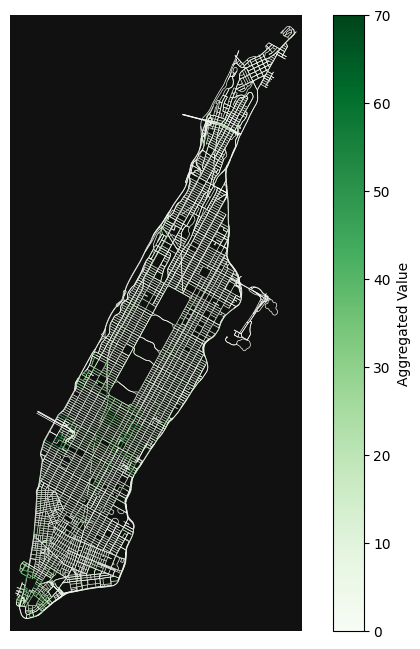

In [8]:
pipeline.visualise(
    result_column="avg_numfloors",
    colormap="Greens",
)

## Step 6: Save the Pipeline

We save the reproducible pipeline to a file (`pluto_pipeline.joblib`) using the `save` method. This allows us to reuse the entire workflow later without redefining it.

> **Tip**: Store the file in a convenient location and adjust the path as needed.

In [6]:
pipeline.save("pluto_pipeline.joblib")

## Step 7: Load and Reuse the Pipeline

We create a new `OSMNxMapping` instance and load the saved pipeline using the `load` method. Then, we visualise the enriched network again to show reproducibility.

> **Note**: Ensure Jupyter extensions are installed for interactive visualisation (see the README’s Installation section).

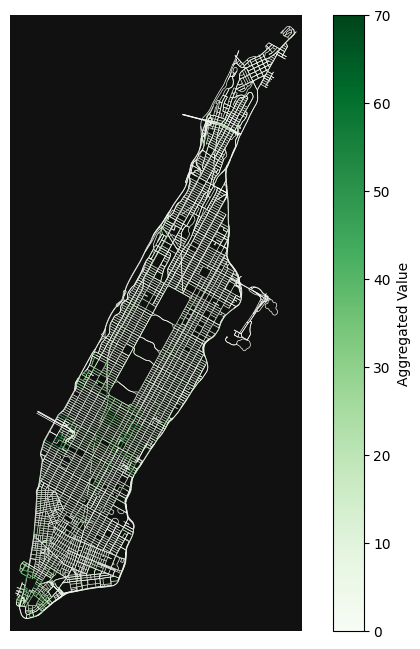

In [8]:
# Create a new instance
pluto_buildings = oxm.OSMNxMapping()

# Load the saved pipeline
pipeline = pluto_buildings.urban_pipeline.load("pluto_pipeline.joblib")

# Visualise
viz = pipeline.visualise(
    result_column="avg_numfloors",
    colormap="Greens",
)

viz

## Conclusion

Well done! 🥐 You’ve built an advanced urban pipeline with OSMNxMapping, processed PLUTO building data in a concise and reproducible way, enriched a Manhattan road network with the average number of floors per street segment, and saved and reloaded the pipeline for reuse 🎉

This pipeline approach is more efficient than the step-by-step methods in previous notebooks, making it ideal for sharing and repeating analyses. For foundational workflows or alternative data sources (e.g., Auctus), refer to the `1-OSMNX_MAPPING_with_Auctus_basics` notebook.

Happy urban mapping! 🌆